<h1 style="font-size:4.5rem;color:blue;">Bio-gas production Models</h1>

### libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

#Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor

#evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Dataset

In [2]:
df = pd.read_csv("biogasdf_ready.csv", parse_dates=['date'])
df['Month'] = df['date'].dt.month
df['Hour'] = pd.to_datetime(df['hour'], format='%H:%M:%S').dt.hour

#### Aggregating using group function with respect to hour variable

In [3]:
df_hour = df.groupby('hour').mean().reset_index()

In [4]:
df_hour = df_hour.fillna(5)
df_hour.head()

,hour,date,fluid_temp,ground_temp,air_umidity,air_temp,gas_umidity,gas_temp,dm3_gas,bio_id,phase_test,Month,Hour
0,00:00:00,2021-11-08 00:00:00,18.942500,-17.657500,94.35,15.300000,90.0925,14.8275,0.000,1.500000,1.000000,11.000000,0.0
1,00:00:02,2022-05-14 00:00:00,20.090000,18.905000,95.90,14.500000,5.0000,5.0000,0.000,1.500000,3.000000,5.000000,0.0
2,00:00:03,2022-01-04 08:00:00,21.563333,21.836667,99.50,15.366667,84.5800,16.4700,0.000,1.333333,0.666667,4.666667,0.0
3,00:00:08,2022-06-26 00:00:00,17.130000,15.785000,93.90,13.500000,5.0000,5.0000,0.005,1.500000,3.000000,6.000000,0.0
4,00:00:16,2021-12-21 00:00:00,22.440000,22.120000,91.60,17.400000,5.0000,5.0000,0.000,1.500000,1.000000,12.000000,0.0


### Feature Varible

In [5]:
# Lets get the range of the each features
columns = ["fluid_temp", "ground_temp", "air_umidity", "air_temp", "gas_umidity", "gas_temp"]
for col in columns:
    print(f" {col}  Minimum Value : {df_hour[col].min()},  Maximum Value: {df_hour[col].max()} change_value: {df_hour[col].max()-df[col].min()}")

 fluid_temp  Minimum Value : -53.0,  Maximum Value: 24.215 change_value: 151.215
 ground_temp  Minimum Value : -54.405,  Maximum Value: 23.97 change_value: 150.97
 air_umidity  Minimum Value : 13.9,  Maximum Value: 99.90000000000002 change_value: 99.90000000000002
 air_temp  Minimum Value : 1.3,  Maximum Value: 52.6 change_value: 52.6
 gas_umidity  Minimum Value : 5.0,  Maximum Value: 110.49 change_value: 78.77
 gas_temp  Minimum Value : -12.17,  Maximum Value: 120.79 change_value: 133.41


In [6]:
df_hour.dm3_gas = round(df_hour['dm3_gas']*1000, 2)
df_hour.dm3_gas.value_counts()

dm3_gas
0.00     18040
5.00      1756
2.50       376
3.33       149
10.00      117
1.67        51
2.00        30
6.67        13
4.00         9
1.43         7
1.25         6
7.50         2
3.75         1
1.11         1
1.00         1
Name: count, dtype: int64

#### Extracting variables values that cobntribute to maximum gas production

In [7]:
df_hour_max = df_hour[df_hour.dm3_gas==10]

In [8]:
df_hour_max.head(10)

,hour,date,fluid_temp,ground_temp,air_umidity,air_temp,gas_umidity,gas_temp,dm3_gas,bio_id,phase_test,Month,Hour
982,01:10:26,2022-03-20,23.375,23.220,96.1,17.7,87.48,17.03,10.0,1.5,2.0,3.0,1.0
1237,01:27:58,2022-03-06,23.845,23.565,96.6,22.9,86.91,21.96,10.0,1.5,2.0,3.0,1.0
1529,01:48:14,2022-03-19,23.340,23.250,97.6,21.0,86.40,19.99,10.0,1.5,2.0,3.0,1.0
1848,02:10:28,2022-03-20,23.345,23.220,96.7,18.0,88.60,17.38,10.0,1.5,2.0,3.0,2.0
3292,03:53:27,2022-03-16,23.660,23.500,98.5,18.9,86.53,18.04,10.0,1.5,2.0,3.0,3.0
3688,04:22:20,2022-03-09,24.065,23.785,97.2,20.7,86.54,19.65,10.0,1.5,2.0,3.0,4.0
4066,04:48:13,2022-03-19,23.340,23.250,99.0,21.0,86.89,20.15,10.0,1.5,2.0,3.0,4.0
4071,04:48:36,2022-03-19,23.340,23.250,99.0,21.0,86.89,20.15,10.0,1.5,2.0,3.0,4.0
4148,04:53:30,2022-03-16,23.660,23.500,99.2,18.9,86.61,18.15,10.0,1.5,2.0,3.0,4.0
4388,05:10:34,2022-03-20,23.345,23.185,97.1,17.5,89.68,16.52,10.0,1.5,2.0,3.0,5.0


In [9]:
# Distinct Values for each feature
for col in df_hour_max.columns:
    print(col)
    print(f"{(df_hour_max[col].nunique())} distinct values")

hour
117 distinct values
date
33 distinct values
fluid_temp
47 distinct values
ground_temp
46 distinct values
air_umidity
88 distinct values
air_temp
79 distinct values
gas_umidity
91 distinct values
gas_temp
90 distinct values
dm3_gas
1 distinct values
bio_id
2 distinct values
phase_test
4 distinct values
Month
6 distinct values
Hour
23 distinct values


In [10]:
for col in df_hour_max.columns:
    print(col)
    print(f"Maximum Value: {df_hour_max[col].max()}")
    print(f"Minimum Value: {df_hour_max[col].min()}")
    print(" ")

hour
Maximum Value: 23:49:46
Minimum Value: 01:10:26
 
date
Maximum Value: 2022-05-07 00:00:00
Minimum Value: 2021-05-03 00:00:00
 
fluid_temp
Maximum Value: 24.155
Minimum Value: 14.38
 
ground_temp
Maximum Value: 23.97
Minimum Value: 15.12
 
air_umidity
Maximum Value: 99.9
Minimum Value: 46.7
 
air_temp
Maximum Value: 37.6
Minimum Value: 9.5
 
gas_umidity
Maximum Value: 91.87
Minimum Value: 5.0
 
gas_temp
Maximum Value: 49.45
Minimum Value: 5.0
 
dm3_gas
Maximum Value: 10.0
Minimum Value: 10.0
 
bio_id
Maximum Value: 1.5
Minimum Value: 1.0
 
phase_test
Maximum Value: 3.0
Minimum Value: 0.0
 
Month
Maximum Value: 12.0
Minimum Value: 1.0
 
Hour
Maximum Value: 23.0
Minimum Value: 1.0
 


<h1 style="font-size:5.5rem;color:red;">MODELS</h1>

<h1 style="font-size:3.5rem;color:maroon;">1.1.0 MODEL USING MOST OF THE FEATURES</h1>

## Dataset

In [11]:
df = pd.read_csv("biogasdf_ready.csv", parse_dates=['date'])
df['Month'] = df['date'].dt.month
df['Hour']= pd.to_datetime(df['hour'], format='%H:%M:%S').dt.hour

## Data Preparation

In [12]:
df_hour = df.groupby('hour').mean().reset_index()

In [13]:
#df_hour.dm3_gas = round(df_hour['dm3_gas']*1000, 2)

In [14]:
df_hour = df_hour.drop(columns = ["date", "hour", 'bio_id', "phase_test", "Month"], axis=1)

In [15]:
# imputing the null values using the mean of each variable to avoid -inf after logging the values "np.log"
for col in df_hour.columns:
    df_hour = df_hour.fillna(df_hour[col].mean())

In [16]:
df_hour.isna().sum()

fluid_temp     0
ground_temp    0
air_umidity    0
air_temp       0
gas_umidity    0
gas_temp       0
dm3_gas        0
Hour           0
dtype: int64

In [17]:
df_hour.columns

Index(['fluid_temp', 'ground_temp', 'air_umidity', 'air_temp', 'gas_umidity',
       'gas_temp', 'dm3_gas', 'Hour'],
      dtype='object')

In [18]:
# get the positive values to avoid "-inf"

df_hour_pos  = df_hour.loc[df_hour['fluid_temp'] > 0]
df_hour_pos  = df_hour_pos.loc[df_hour_pos['ground_temp'] > 0]
df_hour_pos  = df_hour_pos.loc[df_hour_pos['gas_temp'] > 0]

In [19]:
# check for negative values
(df_hour_pos<0).sum()

fluid_temp     0
ground_temp    0
air_umidity    0
air_temp       0
gas_umidity    0
gas_temp       0
dm3_gas        0
Hour           0
dtype: int64

## Test Train Split

In [20]:
X =df_hour_pos.drop(columns = ['dm3_gas'], axis=1)

y = df_hour_pos['dm3_gas']

In [21]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20559 entries, 0 to 20558
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fluid_temp   20559 non-null  float64
 1   ground_temp  20559 non-null  float64
 2   air_umidity  20559 non-null  float64
 3   air_temp     20559 non-null  float64
 4   gas_umidity  20559 non-null  float64
 5   gas_temp     20559 non-null  float64
 6   dm3_gas      20559 non-null  float64
 7   Hour         20559 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [22]:
print(X.shape)
print(X.isna().sum())

(19056, 7)
fluid_temp     0
ground_temp    0
air_umidity    0
air_temp       0
gas_umidity    0
gas_temp       0
Hour           0
dtype: int64


In [23]:
X_train, X_test,y_train,  y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape,  y_train.shape, y_test.shape

((15244, 7), (3812, 7), (15244,), (3812,))

In [24]:
X_train.isna().sum()

fluid_temp     0
ground_temp    0
air_umidity    0
air_temp       0
gas_umidity    0
gas_temp       0
Hour           0
dtype: int64

### Variation reduction using log

In [25]:
X_train_log = np.log(X_train)
X_test_log = np.log(X_test)

C:\Users\bency\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


In [26]:
X_train_log.isna().sum()

fluid_temp     0
ground_temp    0
air_umidity    0
air_temp       0
gas_umidity    0
gas_temp       0
Hour           0
dtype: int64

In [27]:
X_train_log = X_train_log.replace(-np.inf, 0)
X_test_log = X_test_log.replace(-np.inf, 0)

In [28]:
X_train_log.sample(5)

,fluid_temp,ground_temp,air_umidity,air_temp,gas_umidity,gas_temp,Hour
5780,3.060115,3.045950,4.570579,2.602690,2.878393,2.878393,1.791759
6085,2.728506,2.791778,4.579852,2.580217,4.454580,2.475698,1.945910
5726,2.720637,2.768832,4.552824,1.757858,4.584049,1.490654,1.791759
17592,2.924415,2.897200,4.529728,2.575154,4.298985,2.635838,2.995732
15361,3.112181,3.096482,4.028917,3.346389,2.878393,2.878393,2.890372


## Modelling

In [29]:
# iteratng through several models to get the best performing one.

models = {
    "RandomForestRegressor": RandomForestRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(max_depth=3, random_state=42),
    "Ridge": Ridge(alpha=1),
    "Lasso": Lasso(alpha=1)
}

for name, model in models.items():
    model.fit(X_train_log, y_train)
    print(f"{name}: {model.score(X_train_log, y_train)}")

RandomForestRegressor: 0.8003026227904808
DecisionTreeRegressor: 0.08162123816927891
Ridge: 0.03785150052809072
Lasso: 0.0


Random forest regressor performed better.

<h2 style="font-size:2.5rem;color:maroon;">Random Forest Regression</h2>


<h1 style="font-size:1.5rem;color:purple;">Evaluation Metrics</h1>

In [30]:
rfr = RandomForestRegressor()
rfr_model = rfr.fit(X_train_log, y_train)
print(f"Score : {rfr_model.score(X_train_log, y_train)}")
print(f"MAE : {mean_absolute_error(rfr_model.predict(X_train_log), y_train)}")
print(f"MSE : {mean_squared_error(rfr_model.predict(X_train_log), y_train)}")
print(f"R2 : {r2_score(rfr_model.predict(X_train_log), y_train)}")

Score : 0.8017737371203052
MAE : 0.00037343851286509043
MSE : 5.584805227303437e-07
R2 : 0.6306586773440153


### Save the model

In [31]:
import pickle
with open('rfc_model2.pkl', 'wb') as f:
    pickle.dump(rfr_model, f)

In [32]:
#predictng on the large dataset "train dataset"
preds = rfr_model.predict(X_train_log)

In [33]:
modelled = pd.DataFrame({'preds' : preds, 
                        'Hour' : X_train.Hour,
                        'dm3' : y_train}
                )

In [34]:
modelled_group = modelled.groupby('Hour').mean().reset_index()
modelled_group.to_csv("modelled_group.csv", index=False)

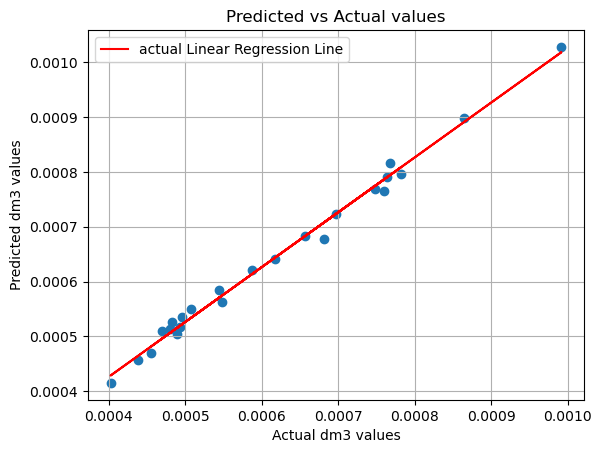

In [35]:
# fitting best fit line
slope1, intercept1 = np.polyfit(modelled_group.dm3, modelled_group.preds, 1)
regression_line1 = slope1 * modelled_group.dm3 + intercept1


plt.scatter(x=modelled_group.dm3, y = modelled_group.preds)
plt.plot(modelled_group.dm3, regression_line1, color='red', label="actual Linear Regression Line")
plt.title("Predicted vs Actual values")
plt.xlabel("Actual dm3 values")
plt.ylabel("Predicted dm3 values")
plt.grid()
plt.legend()
plt.show()

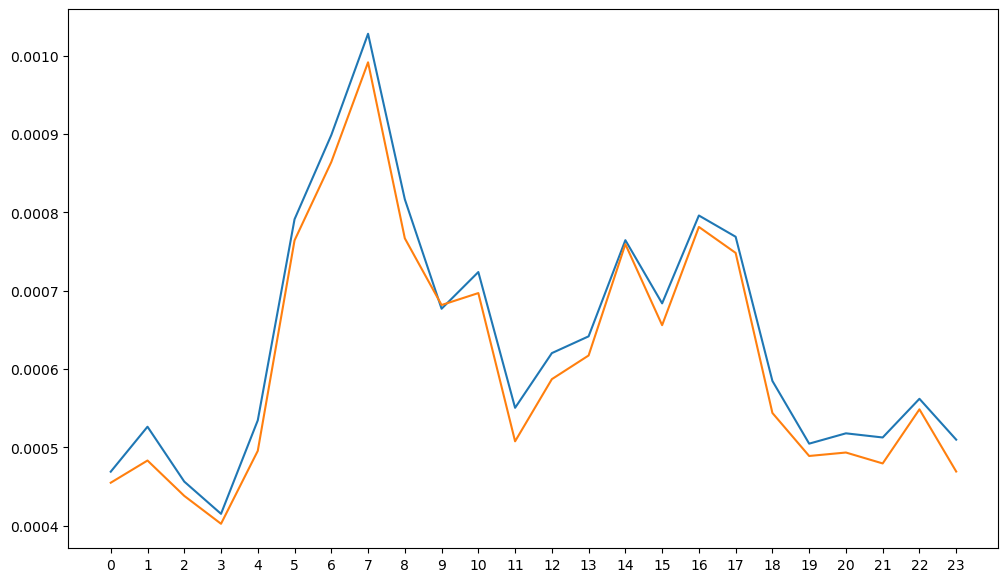

In [36]:
#Visualization
fig, ax = plt.subplots(figsize=(12,7))

ax.plot(modelled_group.Hour, modelled_group.preds, label="preds")
ax.plot(modelled_group.Hour, modelled_group.dm3, label = "actual")
ax.set_xticks(np.arange(0, 24, step=1))
plt.show()

<h1 style="font-size:3.5rem;color:maroon;">Creating input features</h1>

In [37]:
Hour = float(input("hour: "))
gas_temp = float(input("Gas Temperatures: "))
air_umidity = float(input("air humidity: "))
gas_umidity = float(input("gas humidity: "))
air_temp = float(input("gair_temp: "))
ground_temp = float(input("gground_temp: "))
fluid_temp = float(input("fluid_temp: "))

hour: 45
Gas Temperatures: 54
air humidity: 23
gas humidity: 56
gair_temp: 62
gground_temp: 52
fluid_temp: 33


In [38]:
inputs = pd.DataFrame({ "fluid_temp" : [fluid_temp], "ground_temp" : [ground_temp], "air_umidity":[air_umidity],  "air_temp"  : [air_temp],'gas_umidity' : [gas_umidity],  'gas_temp' : [gas_temp], "Hour" : [Hour], })

In [39]:
inputs

,fluid_temp,ground_temp,air_umidity,air_temp,gas_umidity,gas_temp,Hour
0,33.0,52.0,23.0,62.0,56.0,54.0,45.0


In [40]:
inputs_log = np.log(inputs)

In [41]:
inputs_log

,fluid_temp,ground_temp,air_umidity,air_temp,gas_umidity,gas_temp,Hour
0,3.496508,3.951244,3.135494,4.127134,4.025352,3.988984,3.806662


In [42]:
#predictng on the large dataset "train dataset"
pred1 = rfr_model.predict(inputs_log)

In [43]:
print(round(pred1[0],5))

0.00249


<h1 style="font-size:3.5rem;color:maroon;">2.1.0 MODEL USING MOST SIGNIFICANT FEATURES</h1>

## Dataset

In [44]:
df = pd.read_csv("biogasdf_ready.csv", parse_dates=['date'])
df['Month'] = df['date'].dt.month
df['Hour'] = pd.to_datetime(df['hour'], format='%H:%M:%S').dt.hour

In [45]:
df_hour = df.groupby('hour').mean().reset_index()

In [46]:
df_hour = df_hour.fillna(0)
df_hour.head()

,hour,date,fluid_temp,ground_temp,air_umidity,air_temp,gas_umidity,gas_temp,dm3_gas,bio_id,phase_test,Month,Hour
0,00:00:00,2021-11-08 00:00:00,18.942500,-17.657500,94.35,15.300000,90.0925,14.8275,0.000,1.500000,1.000000,11.000000,0.0
1,00:00:02,2022-05-14 00:00:00,20.090000,18.905000,95.90,14.500000,0.0000,0.0000,0.000,1.500000,3.000000,5.000000,0.0
2,00:00:03,2022-01-04 08:00:00,21.563333,21.836667,99.50,15.366667,84.5800,16.4700,0.000,1.333333,0.666667,4.666667,0.0
3,00:00:08,2022-06-26 00:00:00,17.130000,15.785000,93.90,13.500000,0.0000,0.0000,0.005,1.500000,3.000000,6.000000,0.0
4,00:00:16,2021-12-21 00:00:00,22.440000,22.120000,91.60,17.400000,0.0000,0.0000,0.000,1.500000,1.000000,12.000000,0.0


In [47]:
X_2 = df_hour[['fluid_temp', 'air_umidity']]
y_2  = df_hour['dm3_gas']

In [48]:
print(X_2.shape)
X_2.head(3)

(20559, 2)


,fluid_temp,air_umidity
0,18.942500,94.35
1,20.090000,95.90
2,21.563333,99.50


In [49]:
y_2.shape

(20559,)

In [50]:
X_2_log = np.log(X_2)

C:\Users\bency\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


In [51]:
X_2_log = X_2_log.fillna(0)

In [52]:
X_2_log = X_2_log.replace(-np.inf, 0)

In [53]:
print(X_2_log.shape)
X_2_log.head(3)

(20559, 2)


,fluid_temp,air_umidity
0,2.941408,4.547011
1,3.000222,4.563306
2,3.070994,4.600158


In [54]:
X_train_2, X_test_2,y_train_2,  y_test_2 = train_test_split(X_2_log, y_2, test_size=0.3, random_state=42)
X_train_2.shape, X_test_2.shape,  y_train_2.shape, y_test_2.shape

((14391, 2), (6168, 2), (14391,), (6168,))

In [55]:
# iteratng through several models to get the best performing one.

models = {
    "RandomForestRegressor": RandomForestRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(max_depth=3, random_state=42),
    "Ridge": Ridge(alpha=1),
    "Lasso": Lasso(alpha=1)
}

for name, model in models.items():
    model.fit(X_train_2, y_train_2)
    print(f"{name}: {model.score(X_train_2, y_train_2)}")

RandomForestRegressor: 0.7107043365826982
DecisionTreeRegressor: 0.0726267077497258
Ridge: 0.010070531789463266
Lasso: 0.0


In [56]:
rfr2 = RandomForestRegressor()
rfr2_model = rfr2.fit(X_train_2, y_train_2)
print(f"Score : {rfr2_model.score(X_train_2, y_train_2)}")
print(f"MAE : {mean_absolute_error(rfr2_model.predict(X_train_2), y_train_2)}")
print(f"MSE : {mean_squared_error(rfr2_model.predict(X_train_2), y_train_2)}")
print(f"R2 : {r2_score(rfr2_model.predict(X_train_2), y_train_2)}")

Score : 0.7119678550392885
MAE : 0.00041025630538719335
MSE : 7.62049860189663e-07
R2 : 0.4146009887612486


### Saving the model

In [57]:
import pickle
with open('rfc_model3.pkl', 'wb') as f:
    pickle.dump(rfr2_model, f)

In [58]:
pred2 = rfr2_model.predict(X_2_log)

In [59]:
modelled2 = pd.DataFrame({'pred2' : pred2, 
                        'Hour' : df_hour.Hour,
                        'dm3' : y_2}
                )

In [60]:
modelled2_group = modelled2.groupby('Hour').mean().reset_index()
modelled2_group.to_csv("modelled2_group.csv", index=False)

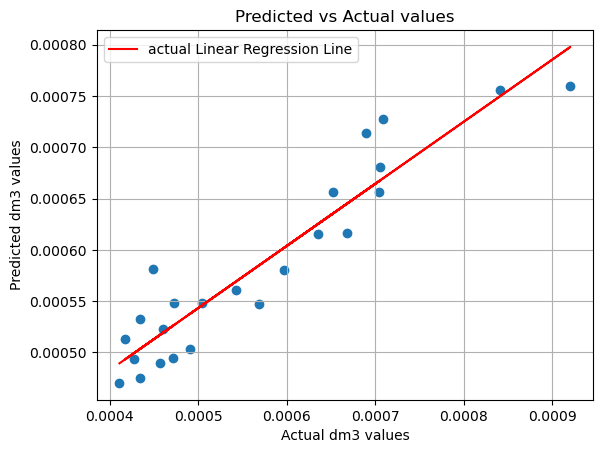

In [61]:
# fitting best fit line
slope1, intercept1 = np.polyfit(modelled2_group.dm3, modelled2_group.pred2, 1)
regression_line1 = slope1 * modelled2_group.dm3 + intercept1


plt.scatter(x=modelled2_group.dm3, y = modelled2_group.pred2)
plt.plot(modelled2_group.dm3, regression_line1, color='red', label="actual Linear Regression Line")
plt.title("Predicted vs Actual values")
plt.xlabel("Actual dm3 values")
plt.ylabel("Predicted dm3 values")
plt.grid()
plt.legend()
plt.show()

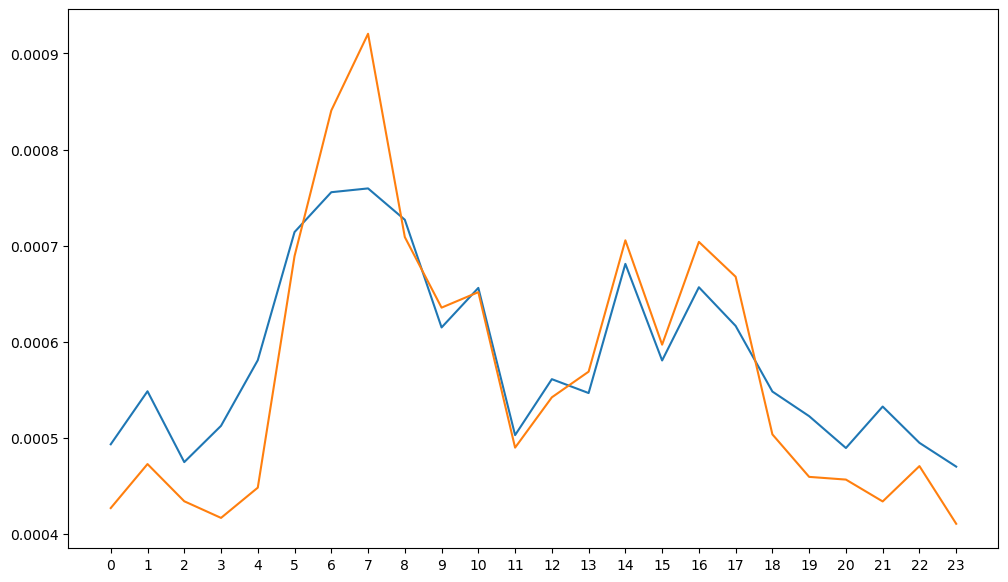

In [62]:
#Visualization
fig, ax = plt.subplots(figsize=(12,7))

ax.plot(modelled2_group.Hour, modelled2_group.pred2, label="preds")
ax.plot(modelled2_group.Hour, modelled2_group.dm3, label = "actual")
ax.set_xticks(np.arange(0, 24, step=1))
plt.show()

## Create Input

In [63]:
fluid_temp = float(input("Fluid_temperature: "))
air_umidity = float(input("Air_umidity: "))

Fluid_temperature: 54
Air_umidity: 34


In [64]:
input2 = pd.DataFrame({"fluid_temp" : [fluid_temp], "air_umidity" : [air_umidity]})

In [65]:
input2

,fluid_temp,air_umidity
0,54.0,34.0


In [66]:
input2_log = np.log(input2)

In [67]:
input2_log

,fluid_temp,air_umidity
0,3.988984,3.526361


In [68]:
sample2 = rfr2_model.predict(input2_log)

In [69]:
round(sample2[0], 5)

0.00421

<h1 style="font-size:3.5rem;color:maroon;">3.1.0 MODEL AUTOMATION</h1>

## Dataset

In [70]:
df = pd.read_csv("biogasdf_ready.csv", parse_dates=['date'])
df['Month'] = df['date'].dt.month
df['Hour'] = pd.to_datetime(df['hour'], format='%H:%M:%S').dt.hour

In [71]:
df_hour = df.groupby('hour').mean().reset_index()

In [72]:
df_hour = df_hour.fillna(0)
df_hour.head()

,hour,date,fluid_temp,ground_temp,air_umidity,air_temp,gas_umidity,gas_temp,dm3_gas,bio_id,phase_test,Month,Hour
0,00:00:00,2021-11-08 00:00:00,18.942500,-17.657500,94.35,15.300000,90.0925,14.8275,0.000,1.500000,1.000000,11.000000,0.0
1,00:00:02,2022-05-14 00:00:00,20.090000,18.905000,95.90,14.500000,0.0000,0.0000,0.000,1.500000,3.000000,5.000000,0.0
2,00:00:03,2022-01-04 08:00:00,21.563333,21.836667,99.50,15.366667,84.5800,16.4700,0.000,1.333333,0.666667,4.666667,0.0
3,00:00:08,2022-06-26 00:00:00,17.130000,15.785000,93.90,13.500000,0.0000,0.0000,0.005,1.500000,3.000000,6.000000,0.0
4,00:00:16,2021-12-21 00:00:00,22.440000,22.120000,91.60,17.400000,0.0000,0.0000,0.000,1.500000,1.000000,12.000000,0.0


In [73]:
three_feat = df_hour[['fluid_temp', 'air_umidity', 'dm3_gas']]
three_feat.to_csv("three_feat.csv", index=False)

In [74]:
three_feat.head()

,fluid_temp,air_umidity,dm3_gas
0,18.942500,94.35,0.000
1,20.090000,95.90,0.000
2,21.563333,99.50,0.000
3,17.130000,93.90,0.005
4,22.440000,91.60,0.000


In [75]:
#Train test split

X_3  = df_hour[['dm3_gas']]
y_3 = df_hour[['fluid_temp', 'air_umidity']]

In [76]:
y_3.head()

,fluid_temp,air_umidity
0,18.942500,94.35
1,20.090000,95.90
2,21.563333,99.50
3,17.130000,93.90
4,22.440000,91.60


In [77]:
X_3.value_counts()

dm3_gas 
0.000000    18040
0.005000     1756
0.002500      376
0.003333      149
0.010000      117
0.001667       51
0.002000       30
0.006667       13
0.004000        9
0.001429        7
0.001250        6
0.007500        2
0.001000        1
0.001111        1
0.003750        1
Name: count, dtype: int64

## 3.2.0 Using Random Forest to predict 2-variables

In [78]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_3, y_3, test_size=0.2, random_state=42)

# Train the linear regression model
model_r = RandomForestRegressor()
model_r.fit(X_train, y_train)

# Predict temp and humidity for a given dm3_gas value


RandomForestRegressor()

In [79]:
dm3_gas_input = 2.0  # Example dm3_gas value
predicted_values = model_r.predict([[dm3_gas_input]])
print("Predicted temp and humidity:", predicted_values)

Predicted temp and humidity: [[22.73457799 83.9938954 ]]


C:\Users\bency\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [80]:
dm3_gas_input = 5.0  # Example dm3_gas value
predicted_values = model_r.predict([[dm3_gas_input]])
print("Predicted temp and humidity:", predicted_values)

C:\Users\bency\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Predicted temp and humidity: [[22.73457799 83.9938954 ]]


In [81]:
import pickle
with open('model_r.pkl', 'wb') as f:
    pickle.dump(model_r, f)

In [82]:
predicted_values = model_r.predict([[5]])
print("Predicted temp and humidity:", predicted_values)

Predicted temp and humidity: [[22.73457799 83.9938954 ]]


C:\Users\bency\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


### Creating a dataframe for output view

In [83]:
df = pd.DataFrame(predicted_values, columns=['Fluid_Temp', 'Air_humidity'])

In [84]:
df

,Fluid_Temp,Air_humidity
0,22.734578,83.993895


In [85]:
print(f"Score : {model_r.score(X_train, y_train)}")
print(f"MAE : {mean_absolute_error(model_r.predict(X_train), y_train)}")
print(f"MSE : {mean_squared_error(model_r.predict(X_train), y_train)}")
print(f"R2 : {r2_score(model_r.predict(X_train), y_train)}")

Score : 0.0064485297050903
MAE : 9.078672691485684
MSE : 209.57188861176826
R2 : -155.13822582700692


## Artiicial Neural Networks

## Libraries

In [86]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [87]:
df = pd.read_csv("biogasdf_ready.csv", parse_dates=['date'])
df['Month'] = df['date'].dt.month
df['Hour'] = pd.to_datetime(df['hour'], format='%H:%M:%S').dt.hour

In [88]:
df_hour = df.groupby('hour').mean().reset_index()

In [89]:
df_hour.dm3_gas = round(df_hour['dm3_gas']*1000, 2)
df_hour = df_hour.fillna(0)

In [90]:
# Selecting features and target variable
X = df_hour[['fluid_temp', 'ground_temp', 'air_umidity', 'air_temp', 'gas_umidity', 'gas_temp', 'Month', 'Hour']]
y = df_hour['dm3_gas']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Single neuron for regression task
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

# Evaluate the model on the testing set
loss = model.evaluate(X_test, y_test)
print('Mean Squared Error on Test Set:', loss)


Epoch 1/50
405/405 [==============================] - 5s 5ms/step - loss: 2.5291 - val_loss: 2.0438
Epoch 2/50
405/405 [==============================] - 2s 4ms/step - loss: 2.4353 - val_loss: 2.0297
Epoch 3/50
405/405 [==============================] - 1s 4ms/step - loss: 2.3947 - val_loss: 2.0267
Epoch 4/50
405/405 [==============================] - 1s 3ms/step - loss: 2.3622 - val_loss: 1.9838
Epoch 5/50
405/405 [==============================] - 2s 5ms/step - loss: 2.3529 - val_loss: 2.0042
Epoch 6/50
405/405 [==============================] - 2s 4ms/step - loss: 2.3469 - val_loss: 1.9898
Epoch 7/50
405/405 [==============================] - 1s 3ms/step - loss: 2.3340 - val_loss: 1.9755
Epoch 8/50
405/405 [==============================] - 2s 4ms/step - loss: 2.3298 - val_loss: 1.9660
Epoch 9/50
405/405 [==============================] - 1s 3ms/step - loss: 2.3223 - val_loss: 1.9634
Epoch 10/50
405/405 [==============================] - 1s 4ms/step - loss: 2.3136 - val_loss: 2.0072

In [91]:
loss = model.evaluate(X_train, y_train)
print('Mean Squared Error on Test Set:', loss)

450/450 [==============================] - 1s 2ms/step - loss: 2.1464
Mean Squared Error on Test Set: 2.1464173793792725


In [92]:
y_prednn = model.predict(X).flatten()

643/643 [==============================] - 2s 2ms/step


In [93]:
from sklearn.metrics import accuracy_score

#print(f"Score : {accuracy_score(y_train, y_prednn)}")
print(f"MAE : {mean_absolute_error(y, y_prednn)}")
print(f"MSE : {mean_squared_error(y, y_prednn)}")
print(f"R2 : {r2_score(y, y_prednn)}")

MAE : 34.13095787660712
MSE : 1376.9552326233425
R2 : -522.3695689235426


In [94]:
modellednn = pd.DataFrame({'pred2' : y_prednn, 
                        'Hour' : df_hour.Hour,
                        'dm3' : y}
                )

In [95]:
modellednn_group = modellednn.groupby('Hour').mean().reset_index()
modellednn_group.to_csv("modellednn_group.csv", index=False)

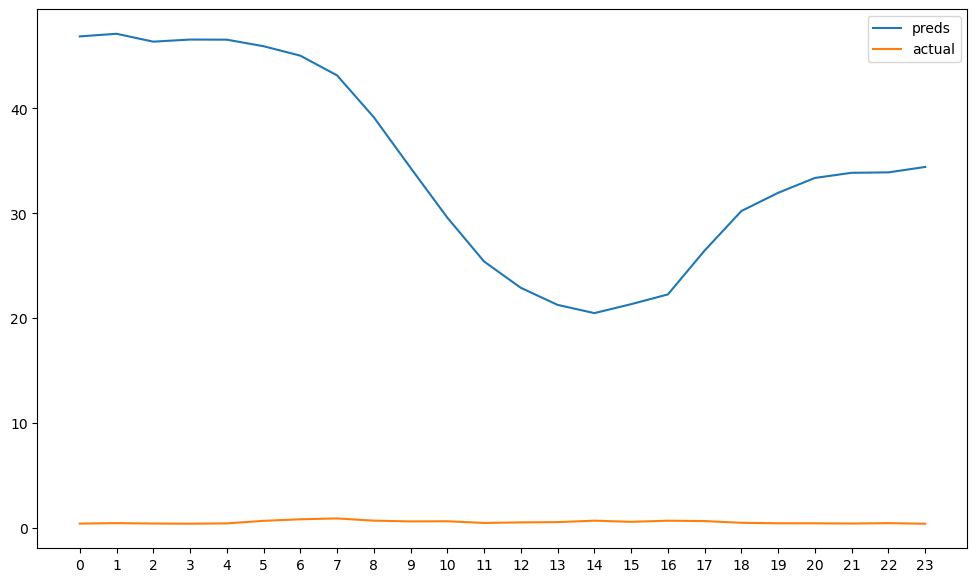

In [96]:
#Visualization
fig, ax = plt.subplots(figsize=(12,7))

ax.plot(modellednn_group.Hour, modellednn_group.pred2, label="preds")
ax.plot(modellednn_group.Hour, modellednn_group.dm3, label = "actual")
ax.set_xticks(np.arange(0, 24, step=1))
plt.legend()
plt.show()

## Random Forest vs Neural network preds

In [97]:
modelled_group = pd.read_csv("modelled_group.csv")
modellednn_group = pd.read_csv("modellednn_group.csv")


In [98]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
modellednn_group['pred2'] = (mm.fit_transform(modellednn_group[['pred2']]))*1000 
modelled_group['dm3'] = modelled_group['dm3']*1000 
modelled_group['preds'] = modelled_group['preds']*1000

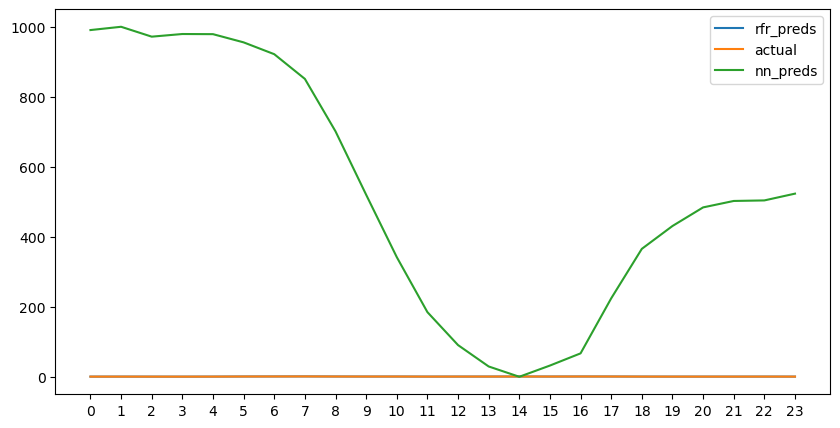

In [99]:
#Visualization
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(modelled_group.Hour, modelled_group.preds, label="rfr_preds")
ax.plot(modelled_group.Hour, modelled_group.dm3, label = "actual")
ax.plot(modellednn_group.Hour, modellednn_group.pred2, label="nn_preds")
ax.set_xticks(np.arange(0, 24, step=1))
ax.legend()
plt.show()

# ANOVA

In [100]:
df = pd.read_csv("biogasdf_ready.csv", parse_dates=['date'])
df['Month'] = df['date'].dt.month
df['Hour'] = pd.to_datetime(df['hour'], format='%H:%M:%S').dt.hour

In [101]:
df = df.drop(columns = ["date", "hour"])

In [102]:
df.head()

,fluid_temp,ground_temp,air_umidity,air_temp,gas_umidity,gas_temp,dm3_gas,bio_id,phase_test,Month,Hour
0,14.81,14.69,66.7,18.8,84.50,16.93,0.0,1,0,8,22
1,14.88,14.69,78.3,18.0,84.45,15.83,0.0,1,0,8,23
2,14.88,14.69,83.2,17.4,84.35,15.22,0.0,1,0,8,0
3,14.88,14.69,84.8,16.7,84.15,14.58,0.0,1,0,8,0
4,14.88,14.69,87.4,16.0,84.10,14.18,0.0,1,0,8,0


In [103]:
import pandas as pd
from scipy.stats import f_oneway

# Select the columns you want to analyze (e.g., fluid_temp, ground_temp, air_umidity)
selected_columns = ['fluid_temp', 'ground_temp', 'air_umidity', "air_temp", "gas_umidity", "gas_temp", "bio_id", "phase_test", "Month","Hour"]

anova_results = {'Column': [], 'F-statistic': [], 'p-value': []}

# Perform ANOVA for each selected column
for col in selected_columns:
    groups = []  # List to store the data for each group
    categories = df['dm3_gas'].unique()  # Assuming we want to analyze based on 'dm3_gas' for now

    for category in categories:
        group_data = df[df['dm3_gas'] == category][col]
        groups.append(group_data)

    # Perform ANOVA
    f_statistic, p_value = f_oneway(*groups)
    
    #Print the results for each column
    print(f"ANOVA results for '{col}':")
    print("F-statistic:", f_statistic)
    print("p-value:", p_value)
    print("\n")

    anova_results['Column'].append(col)
    anova_results['F-statistic'].append(f_statistic)
    anova_results['p-value'].append(p_value)
    
anova_plain = pd.DataFrame(anova_results)
anova_plain =  anova_df.fillna(0)

ANOVA results for 'fluid_temp':
F-statistic: 97.25048160407168
p-value: 6.452735577661749e-23


ANOVA results for 'ground_temp':
F-statistic: 64.3438423670589
p-value: 1.0705680579605237e-15


ANOVA results for 'air_umidity':
F-statistic: 136.63628375332712
p-value: 1.6124486699916627e-31


ANOVA results for 'air_temp':
F-statistic: 8.076217270225412
p-value: 0.004487058740138282


ANOVA results for 'gas_umidity':
F-statistic: nan
p-value: nan


ANOVA results for 'gas_temp':
F-statistic: nan
p-value: nan


ANOVA results for 'bio_id':
F-statistic: 752.7906407709883
p-value: 2.4148110316074167e-164


ANOVA results for 'phase_test':
F-statistic: 1558.0180712996014
p-value: 0.0


ANOVA results for 'Month':
F-statistic: 557.3942048220734
p-value: 1.7964642849312632e-122


ANOVA results for 'Hour':
F-statistic: 4.315935956271863
p-value: 0.03776278069481702




NameError: name 'anova_df' is not defined

In [104]:
anova_plain.to_csv("anova_plain.csv", index=False)

### Using hourly grouped values

In [105]:
df = pd.read_csv("biogasdf_ready.csv", parse_dates=['date'])
df['Month'] = df['date'].dt.month
#df['Hour'] = pd.to_datetime(df['hour'], format='%H:%M:%S').dt.hour
df_hour = df.groupby('hour').mean().reset_index()

In [106]:
df_hour = df_hour.drop(columns = ["date", "hour"])

In [107]:
import pandas as pd
from scipy.stats import f_oneway

# Select the columns you want to analyze (e.g., fluid_temp, ground_temp, air_umidity)
selected_columns = ['fluid_temp', 'ground_temp', 'air_umidity', "air_temp", "gas_umidity", "gas_temp", "bio_id", "phase_test", "Month"]

anova_results = {'Column': [], 'F-statistic': [], 'p-value': []}


# Perform ANOVA for each selected column
for col in selected_columns:
    groups = []  # List to store the data for each group
    categories = df_hour['dm3_gas'].unique()  # Assuming we want to analyze based on 'dm3_gas' for now

    for category in categories:
        group_data = df_hour[df_hour['dm3_gas'] == category][col]
        groups.append(group_data)

    # Perform ANOVA
    f_statistic, p_value = f_oneway(*groups)
    
    # Print the results for each column
    print(f"ANOVA results for '{col}':")
    print("F-statistic:", f_statistic)
    print("p-value:", p_value)
    print("\n")
    anova_results['Column'].append(col)
    anova_results['F-statistic'].append(f_statistic)
    anova_results['p-value'].append(p_value)
    
anova_hour = pd.DataFrame(anova_results)
anova_hour =  anova_df.fillna(0)

ANOVA results for 'fluid_temp':
F-statistic: 9.620235990117884
p-value: 9.670027827669945e-22


ANOVA results for 'ground_temp':
F-statistic: 9.122320175187872
p-value: 2.2602493340110713e-20


ANOVA results for 'air_umidity':
F-statistic: 8.589242018893147
p-value: 6.482801869722251e-19


ANOVA results for 'air_temp':
F-statistic: 4.535745539675785
p-value: 2.9220128498051542e-08


ANOVA results for 'gas_umidity':
F-statistic: nan
p-value: nan


ANOVA results for 'gas_temp':
F-statistic: nan
p-value: nan


ANOVA results for 'bio_id':
F-statistic: 48.16077373705148
p-value: 1.4911457074647116e-132


ANOVA results for 'phase_test':
F-statistic: 131.77150982658185
p-value: 0.0


ANOVA results for 'Month':
F-statistic: 35.37459581146053
p-value: 1.5475459140684477e-95




NameError: name 'anova_df' is not defined

In [108]:
anova_hour.to_csv("anova_hour.csv", index=False)

In [109]:
anova_hour['p-value'] = round(anova_hour['p-value'],5)
anova_hour['F-statistic'] = round(anova_hour['F-statistic'],5)

In [110]:
anova_hour

,Column,F-statistic,p-value
0,fluid_temp,9.62024,0.0
1,ground_temp,9.12232,0.0
2,air_umidity,8.58924,0.0
3,air_temp,4.53575,0.0
4,gas_umidity,NaN,NaN
5,gas_temp,NaN,NaN
6,bio_id,48.16077,0.0
7,phase_test,131.77151,0.0
8,Month,35.37460,0.0


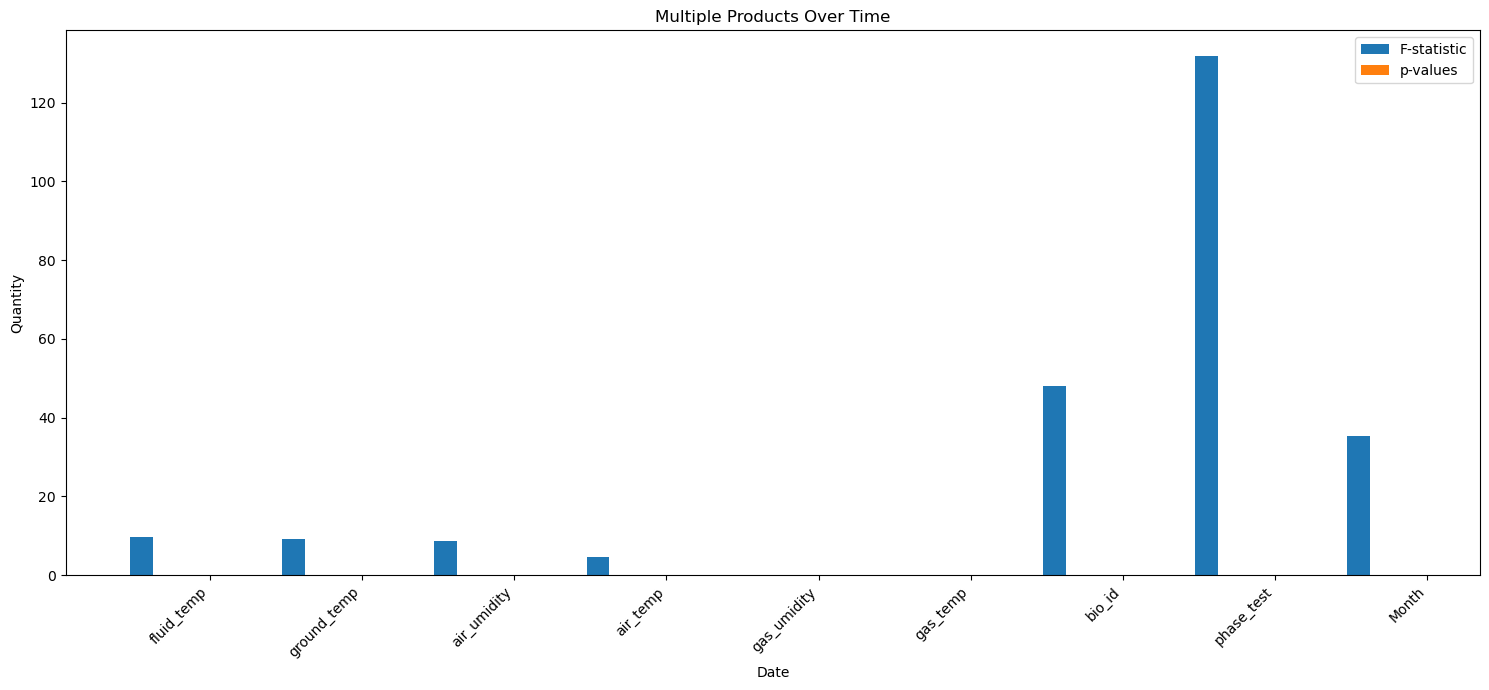

In [111]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 7))

# Define the width of each bar
bar_width = 0.15  # Adjust the bar width as needed

# Create x-values for the bars for the first set of data
x1 = range(len(anova_hour.Column))

# Create x-values for each set of bars
x2_f = [x + bar_width for x in x1]
x2_p = [x + 2 * bar_width for x in x1]

# Plot the first set of bars
ax.bar(x1, anova_hour["F-statistic"], width=bar_width, label='F-statistic')

# Plot the second set of bars
ax.bar(x2_p, anova_hour["p-value"], width=bar_width, label='p-values')


# Set the x-axis labels to be the dates
ax.set_xticks([x + 3 * bar_width for x in x1])
ax.set_xticklabels(anova_hour.Column, rotation=45, ha='right')

# Add a legend
ax.legend()

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Quantity')
ax.set_title('Multiple Products Over Time')

# Show the plot
plt.tight_layout()
plt.show()


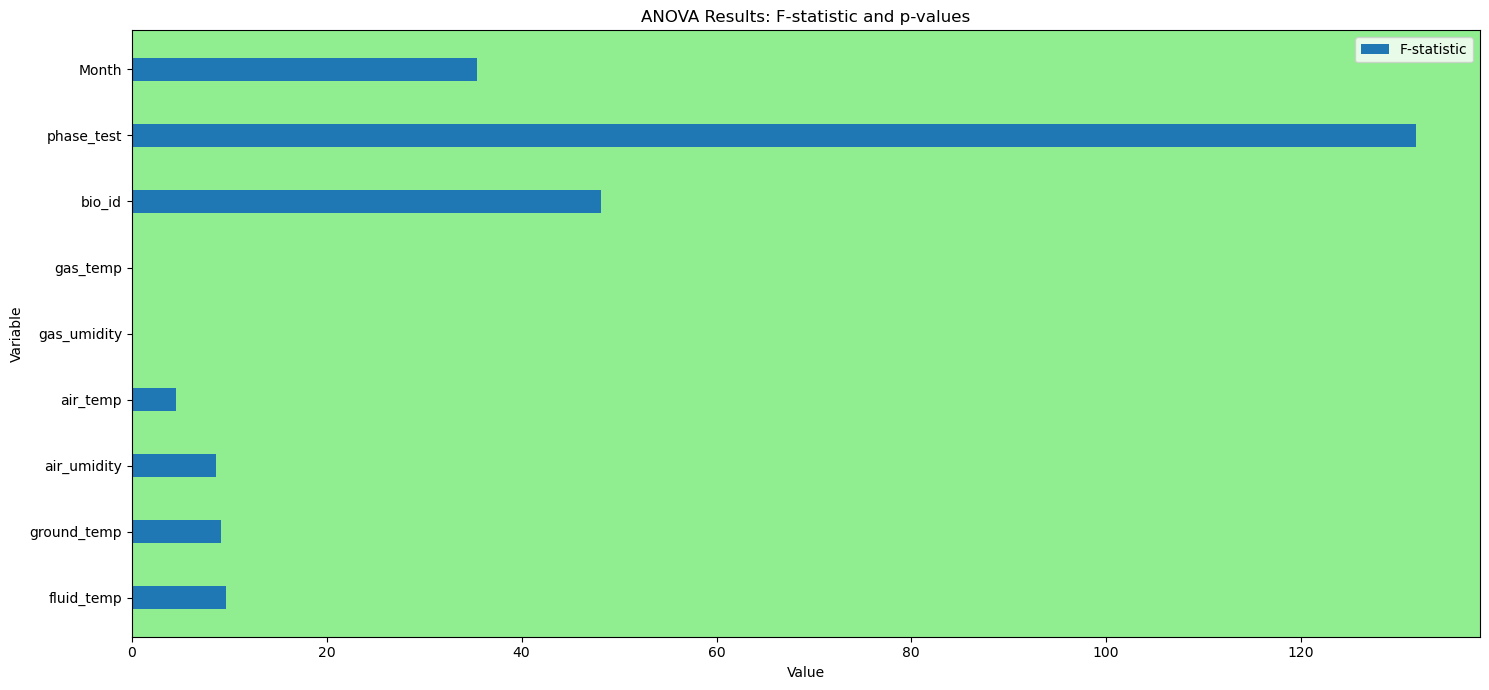

In [112]:
import matplotlib.pyplot as plt
import pandas as pd


# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 7))

# Define the width of each bar
bar_width = 0.35  # Adjust the bar width as needed

# Create x-values for the bars for the first set of data
x1 = range(len(anova_hour))

# Plot the first set of bars (F-statistic)
ax.barh(x1, anova_hour["F-statistic"], height=bar_width, label='F-statistic')

# Plot the second set of bars (p-values)
# ax.barh(x1, anova_hour["p-value"], height=bar_width, left=anova_hour["F-statistic"],
#         label='p-values', color='orange')

# Set the y-axis labels to be the columns
ax.set_facecolor('lightgreen')
ax.set_yticks(x1)
ax.set_yticklabels(anova_hour.Column)

# Add a legend
ax.legend()

# Set labels and title
ax.set_ylabel('Variable')
ax.set_xlabel('Value')
ax.set_title('ANOVA Results: F-statistic and p-values')

# Show the plot
plt.tight_layout()
plt.show()


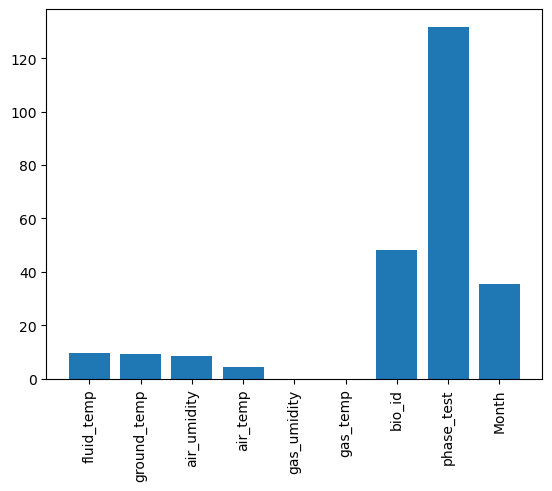

In [113]:
plt.bar(anova_hour["Column"], anova_hour["F-statistic"])
plt.xticks(rotation=90)
plt.show()

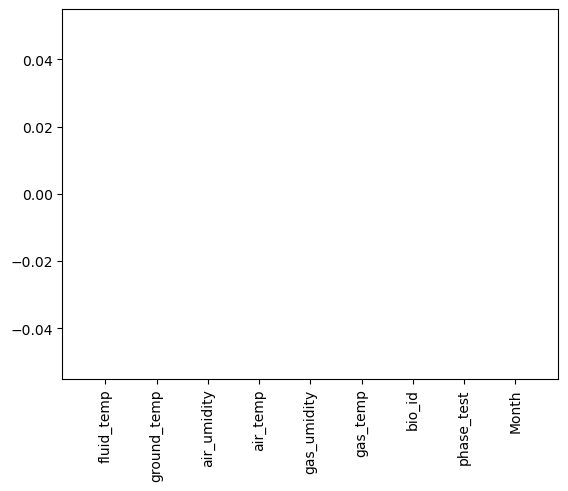

In [114]:
plt.bar(anova_hour["Column"], anova_hour["p-value"])
plt.xticks(rotation=90)
plt.show()

### Evaluation Metrics

In [134]:
av_actual_values = modelled['dm3'].mean()
av_actual_values

0.0006121435235512906

In [136]:
av_pred_values = modelled["preds"].mean()
av_pred_values

0.0006385863485711789

### To get the Mean Absolute Error

MAE = (1/n) * Σ |Predicted Value - Actual Value|


Only that in this case,  we have to find the difference between each value.

### After reversing to the original regression values by dividing by 1000

In [132]:
# predicted values
# getting the average mean
av_pred1000 = (modelled['dm3']/1000).mean()
av_pred1000 

6.121435235512906e-07

In [133]:
# actual values
# getting the average mean

av_act1000 = (modelled['preds']/1000).mean()
av_act1000

6.385863485711789e-07